### Задание 1

Закон Бугера–Ламберта–Бера связывает концентрацию $c$ вещества в образце раствора с интенсивностью света, проходящего через этот образец $I_t$ с заданной толщиной слоя вещества $l$ при известной длине волны $\lambda$:

$$
    I_t = I_0 e^ {-\alpha c l}
$$

где $I_0$ - интенсивность света на входе в вещество, $\alpha$ - коэффициент поглощения при длине волны $\lambda$.

После проведения ряда измерений, позволяющих определить часть света, которая прошла сквозь раствор, $I_t /I_0$, коэффициент поглощения $\alpha$ можно найти при помощи линейной аппроксимации:

$$
    y = \ln \left(I_t/I_0\right) = -\alpha c l
$$

Несмотря на то что эта прямая проходит через начало координат ($y = 0$ при $c = 0$), мы будем выполнять подгонку для более общего линейного отношения:

$$
    y = mc + k
$$

где $m = -\alpha l$ с проверкой $k$ на приближение к нулю.

При рассмотрении образца раствора с толщиной слоя $0.8$ см при измерениях были получены данные, приведенные в таблице: отношение $I_t /I_0$ при пяти различных концентрациях:

|C, моль/л|$I_t /I_0$|
|-|-|
|0.4|0.891|
|0.6|0.841|
|0.8|0.783|
|1.0|0.744|
|1.2|0.692|

Используя линейную аппроксимацию, определите коэффициент $\alpha$. Постройте график по табличным данным и результатам аппроксимации.

In [3]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from typing import Callable

In [8]:
def linear(
        c: float, 
        params: tuple[float, float]
) -> float:
    m, k = params
    return m * c + k

In [9]:
def residuals(
        params: tuple[float, float],
        x: np.ndarray,
        y: np.ndarray,
        fun: Callable
) -> np.ndarray:
    return y - fun(x, params)

In [14]:
c = np.arange(.4, 1.4, .2)
i = np.array(
    [
        .891, .841, .783, .744, .692
    ]
)
l = .8

In [16]:
params0 = .1, .1
res = least_squares(
    fun=residuals,
    x0=params0,
    args=(
        c,
        np.log(i),
        linear
    )
)

In [18]:
res

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.608e-03  3.446e-03 -5.206e-03  6.509e-03 -3.140e-03]
           x: [-3.140e-01  1.181e-02]
        cost: 4.689340652441806e-05
         jac: [[-4.000e-01 -1.000e+00]
               [-6.000e-01 -1.000e+00]
               [-8.000e-01 -1.000e+00]
               [-1.000e+00 -1.000e+00]
               [-1.200e+00 -1.000e+00]]
        grad: [-8.304e-12 -6.939e-17]
  optimality: 8.304052239265714e-12
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 4
        njev: 4

In [17]:
m, k = res.x

In [41]:
alpha = -m / l
alpha

0.39254223058197435

In [42]:
plt.style.use('dark_background')

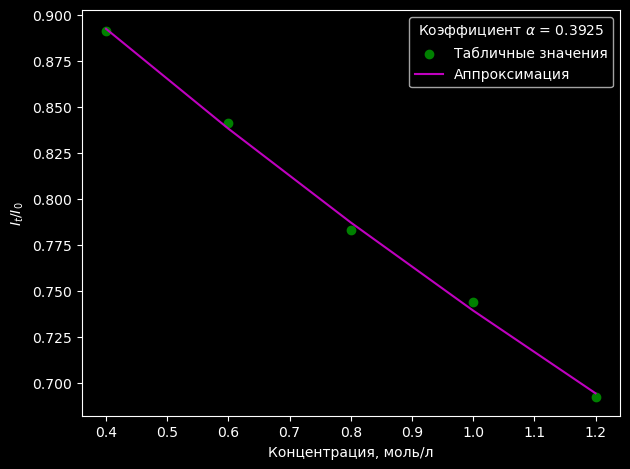

In [45]:
fig, ax = plt.subplots()

ax.scatter(c, i, marker='o', color='g', label='Табличные значения')
ax.plot(c, np.exp(linear(c, res.x)), color='m', label='Аппроксимация')
ax.set_xlabel('Концентрация, моль/л')
ax.set_ylabel(r'$I_t/I_0$')
plt.legend(title=r'Коэффициент $\alpha$ = ' f'{alpha:6.4f}')
plt.tight_layout()